In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

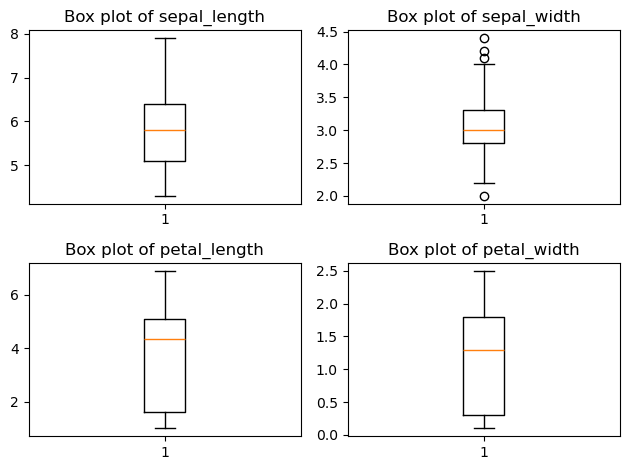

In [6]:
def showOutliers():
    for i, col in enumerate(['sepal_length','sepal_width','petal_length','petal_width']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [7]:
# Remove outliers based on IQR
columns_to_check = ['sepal_length','sepal_width','petal_length','petal_width']
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nAfter Removing Outliers:")
df



After Removing Outliers:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


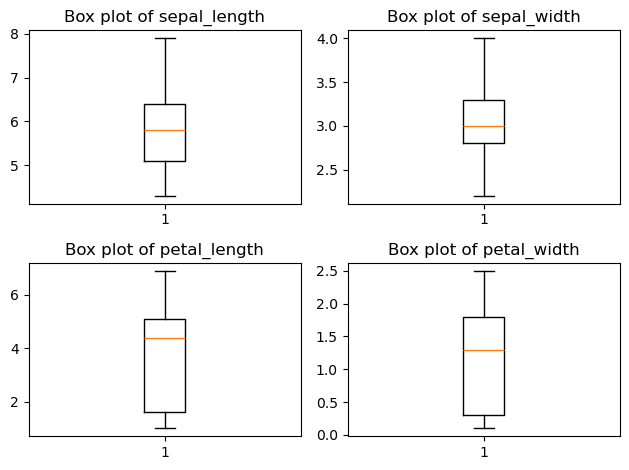

In [8]:
def showOutliers():
    for i, col in enumerate(['sepal_length','sepal_width','petal_length','petal_width']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [9]:
# Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[columns_to_check] = scaler.fit_transform(df_scaled[columns_to_check])

print("\nAfter Scaling (Normalization):")
df_scaled



After Scaling (Normalization):


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.722222,0.067797,0.041667,setosa
1,0.166667,0.444444,0.067797,0.041667,setosa
2,0.111111,0.555556,0.050847,0.041667,setosa
3,0.083333,0.500000,0.084746,0.041667,setosa
4,0.194444,0.777778,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,virginica
146,0.555556,0.166667,0.677966,0.750000,virginica
147,0.611111,0.444444,0.711864,0.791667,virginica
148,0.527778,0.666667,0.745763,0.916667,virginica


<Axes: xlabel='sepal_length', ylabel='Count'>

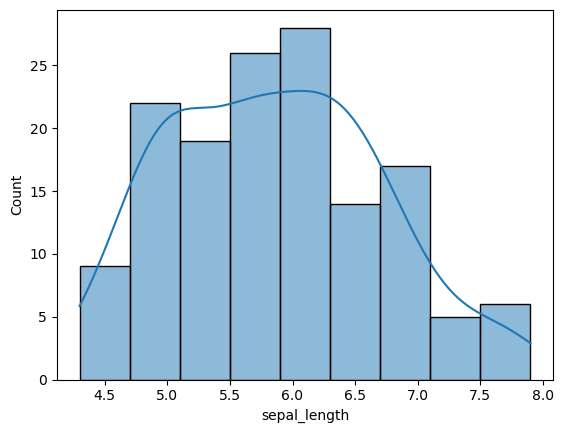

In [11]:
sns.histplot(x = df['sepal_length'], kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

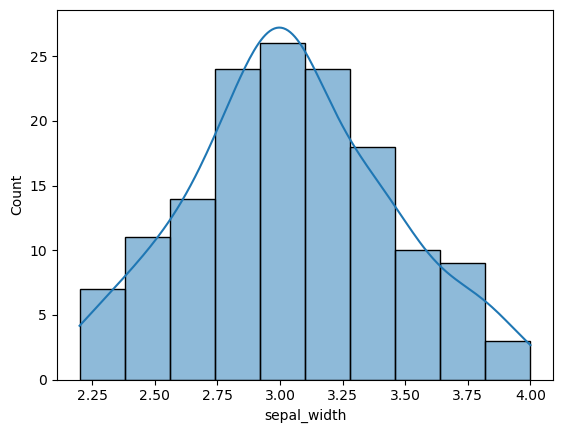

In [12]:
sns.histplot(x = df['sepal_width'], kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

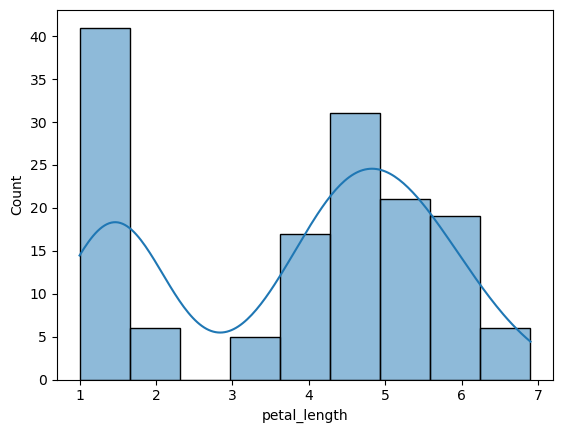

In [13]:
sns.histplot(x = df['petal_length'], kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

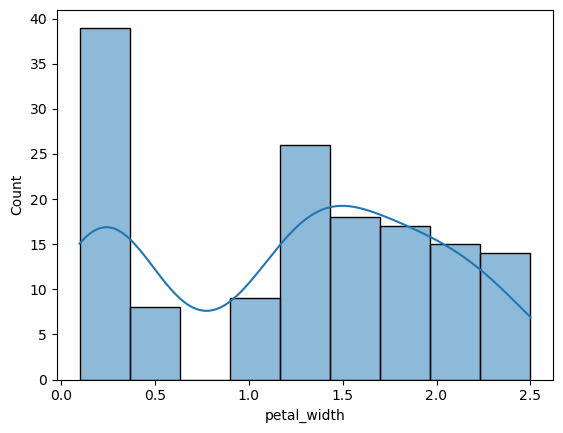

In [15]:
sns.histplot(x = df['petal_width'], kde=True)

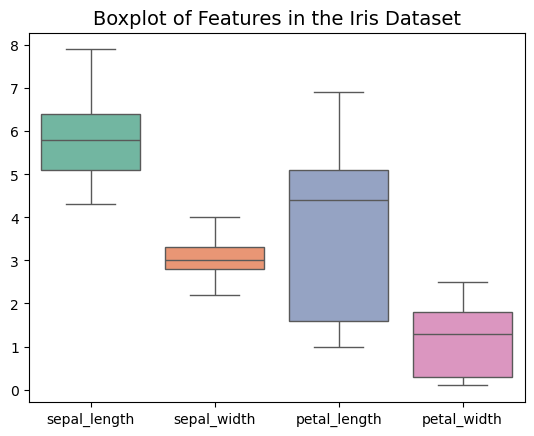

In [24]:
sns.boxplot(data=df, palette="Set2")

plt.title("Boxplot of Features in the Iris Dataset", fontsize=14)
plt.show()